C5i Hackathon
TEAM NAME- SAS_009


In [1]:
import numpy as np
import pandas as pd

DATA LOADING

In [2]:
df_xls = pd.ExcelFile('Final Data File_Training.xlsx')
df_data_labels = pd.read_excel(df_xls, sheet_name='Data Set with Labels Text')
df_data_values = pd.read_excel(df_xls, sheet_name='Data Set with Values')
df_data_dict = pd.read_excel(df_xls, sheet_name='Data Dictionary')

In [3]:
de_xls = pd.ExcelFile('Final Data File_Test.xlsx')
de_data_labels = pd.read_excel(de_xls, sheet_name='Data Set with Labels Text')
de_data_values = pd.read_excel(de_xls, sheet_name='Data Set with Values')
de_data_dict = pd.read_excel(de_xls, sheet_name='Data Dictionary')


In [4]:
df_data_values = df_data_values.dropna(subset=['Start Date'])
df_data_labels = df_data_labels.dropna(subset=['Start Date'])
de_data_values = de_data_values.dropna(subset=['Start Date'])
de_data_labels = de_data_labels.dropna(subset=['Start Date'])



In [5]:
df_data_values

,Unique ID,Start Date,End Date,Q1. What is your current age? \n(Age),Q2. What is your gender? \n(Gender),Q3. Which of the following best describes the area or community in which you live? \n(Urban/Rural),Q4. Please indicate the answer that includes your entire household income in (previous year) before taxes. \n(Income),Q6 Which of the following types of alcoholic beverages have you consumed in the past 4 weeks?\n(Alcohol Category),Unnamed: 8,Unnamed: 9,...,Q13. How does the price fit with what you’d expect the shown to cost?\n(Concept_Price),Q14. Which statement below best describes how likely you would be to buy shown product if it were available at your local stores?\n(Concept_Purchase Intent),"Q15. If the shwon product was available to you, how often would you expect yourself to drink at least one of these products?\n(Concept_Drinking Frequency)",Q16A. What is the most important thing you LIKE about the shown concept}? This can include anything you would want kept for sure or aspects that might drive you to buy or try it… Please type a detailed response in the space below,"Q16B. What is the most important thing you DISLIKE about the shown concept}? This can include general concerns, annoyances, or any aspects of the product that need fixed for this to be more appealing to you... Please type a detailed response in the space below.","Q17. We would like to know what effect this new product might have on the other beverages you buy. If it were available, would the shown product…? \n(Concept_Replacement Product)",Q18_1 What specific product that you are currently using would the shown product replace?\n Please type in ONE specific brand or product per space provided.,Q18_2 What specific product that you are currently using would the shown concept replace?\n Please type in ONE specific brand or product per space provided.,Q18_3 What specific product that you are currently using would the shown concept replace?\n Please type in ONE specific brand or product per space provided.,OE_Quality_Flag
1,3.0,2024-10-11 09:43:37,2024-10-11 09:53:40,60.0,2.0,3.0,12.0,1,0,0,...,3.0,2.0,2.0,the packaging,nothing,1.0,NaN,NaN,NaN,0.0
2,5.0,2024-10-11 09:42:41,2024-10-11 09:55:49,61.0,1.0,3.0,3.0,1,0,0,...,3.0,5.0,4.0,It's a good and trusted brand.,It's seem some what generic.,2.0,Heineken,Miller Lite,Budwieser,0.0
3,6.0,2024-10-11 09:46:20,2024-10-11 09:56:42,58.0,1.0,1.0,8.0,1,0,0,...,3.0,1.0,0.0,Just that it is a lager beer,I don't like Anheiser Busch and their values a...,1.0,NaN,NaN,NaN,0.0
4,8.0,2024-10-11 09:47:15,2024-10-11 09:57:19,55.0,1.0,3.0,11.0,1,0,0,...,3.0,5.0,7.0,has a less filling effect,no dislike,2.0,michelob ultra,Miller light,corona,0.0
5,10.0,2024-10-11 09:45:24,2024-10-11 09:57:30,64.0,1.0,5.0,3.0,1,1,0,...,5.0,5.0,6.0,Everything,Nothing,3.0,Coors light,Bud,Coors,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,3214.0,2024-10-24 17:30:15,2024-10-24 17:38:37,56.0,1.0,5.0,11.0,1,0,0,...,4.0,3.0,6.0,"Beer, taste funny",Looks bad,1.0,NaN,NaN,NaN,0.0
2296,3215.0,2024-10-24 17:35:08,2024-10-24 18:06:36,39.0,2.0,2.0,9.0,1,0,0,...,3.0,2.0,0.0,I like that it's made with American ingredients,It's low calorie,1.0,NaN,NaN,NaN,0.0
2297,3217.0,2024-10-24 18:32:32,2024-10-24 18:39:30,50.0,1.0,3.0,9.0,1,0,0,...,3.0,4.0,6.0,I like the fancy bottle and the color of the beer,I dislike the price,2.0,Budweiser,Coors,Miller,0.0
2298,3218.0,2024-10-24 18:36:06,2024-10-24 18:49:57,57.0,2.0,2.0,10.0,1,0,0,...,3.0,4.0,2.0,No artificial flavors or colors and only 85 ca...,The price could be a little lower.,1.0,NaN,NaN,NaN,0.0


In [6]:
df_data_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2299 entries, 1 to 2299
Data columns (total 36 columns):
 #   Column                                                                                                                                                                                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                                        --------------  -----         
 0   Unique ID                                                                                                                                                                                                                                                                     2299 non-nu

In [7]:
print(de_data_values.columns.tolist())
print(df_data_values.columns.tolist())

['Unique ID', 'Start Date', 'End Date', 'Q1. What is your current age? \n(Age)', 'Q2. What is your gender? \n(Gender)', 'Q3. Which of the following best describes the area or community in which you live? \n(Urban/Rural)', 'Q4.  Please indicate the answer that includes your entire household income in (previous year) before taxes. \n(Income)', 'Q6 Which of the following types of alcoholic beverages have you consumed in the past 4 weeks?\n(Alcohol Category)', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Q7. Which of the following beer types of have you consumed in the past 4 weeks? \n(Beer Category )', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Q9. How relevant would you say the shown product is to you based on what you saw and read?\n(Concept Relevance)', 'Q10. How appealing or unappealing is the shown product  to you?\n(Concept Appeal)', 'Q11. How different do you think the shown p

FEATURE ENGINEERING


In [8]:
de_data_values.loc[:, 'Start Date'] = pd.to_datetime(de_data_values['Start Date'], errors='coerce')
de_data_values.loc[:, 'End Date'] = pd.to_datetime(de_data_values['End Date'], errors='coerce')
de_data_values.loc[:, 'time_taken'] = (de_data_values['End Date'] - de_data_values['Start Date']).dt.total_seconds() / 60

df_data_values.loc[:, 'Start Date'] = pd.to_datetime(df_data_values['Start Date'], errors='coerce')
df_data_values.loc[:, 'End Date'] = pd.to_datetime(df_data_values['End Date'], errors='coerce')
df_data_values.loc[:, 'time_taken'] = (df_data_values['End Date'] - df_data_values['Start Date']).dt.total_seconds() / 60

print("de_data_values time_taken preview:")
print(de_data_values[['time_taken']].head())

print("\ndf_data_values time_taken preview:")
print(df_data_values[['time_taken']].head())


de_data_values time_taken preview:
   time_taken
1    9.000000
2   21.116667
3   12.100000
4   27.666667
5    9.100000

df_data_values time_taken preview:
   time_taken
1   10.050000
2   13.133333
3   10.366667
4   10.066667
5   12.100000


DATA PREPROCESSING

In [9]:
de_data_values.columns = de_data_values.columns.str.strip().str.replace("\n", " ", regex=True)
df_data_values.columns = df_data_values.columns.str.strip().str.replace("\n", " ", regex=True)


In [10]:
print("Value counts in de_data_values:", df_data_values['OE_Quality_Flag'].value_counts())



Value counts in de_data_values: OE_Quality_Flag
0.0    2119
1.0     180
Name: count, dtype: int64


In [11]:

print("Value counts in df_labels_values:", df_data_labels['OE_Quality_Flag'].value_counts())



Value counts in df_labels_values: OE_Quality_Flag
0.0    2119
1.0     180
Name: count, dtype: int64


In [12]:
print(de_data_values.columns.tolist())
print(df_data_values.columns.tolist())


['Unique ID', 'Start Date', 'End Date', 'Q1. What is your current age?  (Age)', 'Q2. What is your gender?  (Gender)', 'Q3. Which of the following best describes the area or community in which you live?  (Urban/Rural)', 'Q4.  Please indicate the answer that includes your entire household income in (previous year) before taxes.  (Income)', 'Q6 Which of the following types of alcoholic beverages have you consumed in the past 4 weeks? (Alcohol Category)', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Q7. Which of the following beer types of have you consumed in the past 4 weeks?  (Beer Category )', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Q9. How relevant would you say the shown product is to you based on what you saw and read? (Concept Relevance)', 'Q10. How appealing or unappealing is the shown product  to you? (Concept Appeal)', 'Q11. How different do you think the shown product i

In [13]:
print("de_data_values null counts:", de_data_values['Q2. What is your gender?  (Gender)'].isnull().sum())
print("df_data_values null counts:", df_data_values['Q2. What is your gender?  (Gender)'].isnull().sum())


de_data_values null counts: 0
df_data_values null counts: 0


In [14]:
age_column = "Q1. What is your current age?  (Age)"

bins = [5, 18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ["5-17", "18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69"]

df_age_groups = pd.cut(df_data_values[age_column], bins=bins, labels=labels, right=False)
df_age_distribution = df_age_groups.value_counts().sort_index()

de_age_groups = pd.cut(de_data_values[age_column], bins=bins, labels=labels, right=False)
de_age_distribution = de_age_groups.value_counts().sort_index()

print("df_data_values Age Distribution:\n", df_age_distribution)
print("\nde_data_values Age Distribution:\n", de_age_distribution)


df_data_values Age Distribution:
 Q1. What is your current age?  (Age)
5-17       0
18-24     66
25-29    192
30-34    281
35-39    363
40-44    301
45-49    241
50-54    254
55-59    235
60-64    302
65-69     64
Name: count, dtype: int64

de_data_values Age Distribution:
 Q1. What is your current age?  (Age)
5-17      0
18-24    16
25-29    47
30-34    34
35-39    64
40-44    50
45-49    43
50-54    50
55-59    39
60-64    72
65-69    13
Name: count, dtype: int64


In [15]:
print("de_data_values value counts:\n", de_data_values['Q2. What is your gender?  (Gender)'].value_counts())
print("\ndf_data_values value counts:\n", df_data_values['Q2. What is your gender?  (Gender)'].value_counts())


de_data_values value counts:
 Q2. What is your gender?  (Gender)
1.0    229
2.0    196
3.0      2
4.0      1
Name: count, dtype: int64

df_data_values value counts:
 Q2. What is your gender?  (Gender)
1.0    1253
2.0    1033
3.0       7
4.0       5
5.0       1
Name: count, dtype: int64


In [16]:
column_name = "Q3. Which of the following best describes the area or community in which you live?  (Urban/Rural)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())

print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())

df_data_values value counts:
 Q3. Which of the following best describes the area or community in which you live?  (Urban/Rural)
1.0    806
3.0    756
2.0    318
5.0    210
4.0    209
Name: count, dtype: int64

de_data_values value counts:
 Q3. Which of the following best describes the area or community in which you live?  (Urban/Rural)
1.0    159
3.0    132
2.0     59
5.0     43
4.0     35
Name: count, dtype: int64


In [17]:
column_name = "Q4.  Please indicate the answer that includes your entire household income in (previous year) before taxes.  (Income)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())

print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())


df_data_values value counts:
 Q4.  Please indicate the answer that includes your entire household income in (previous year) before taxes.  (Income)
1.0     338
11.0    321
3.0     279
6.0     256
4.0     234
5.0     204
12.0    171
7.0     157
8.0     155
9.0      95
10.0     89
Name: count, dtype: int64

de_data_values value counts:
 Q4.  Please indicate the answer that includes your entire household income in (previous year) before taxes.  (Income)
1.0     68
3.0     64
11.0    49
6.0     48
4.0     40
5.0     32
12.0    32
7.0     31
8.0     31
10.0    17
9.0     16
Name: count, dtype: int64


In [18]:
new_column_names = {
    "Q6 Which of the following types of alcoholic beverages have you consumed in the past 4 weeks? (Alcohol Category)": "Beer",
    "Unnamed: 8": "Flavored/Mixed Beer",
    "Unnamed: 9": "Non-Alcoholic Beers",
    "Unnamed: 10": "Hard Ciders",
    "Unnamed: 11": "Hard Kombucha",
    "Unnamed: 12": "Wine",
    "Unnamed: 13": "Hard Beverage",
    "Unnamed: 14": "Distilled Spirits"
}


df_data_values.rename(columns=new_column_names, inplace=True)
de_data_values.rename(columns=new_column_names, inplace=True)

print("Columns renamed successfully!")




Columns renamed successfully!


In [19]:
for column_name in new_column_names.values():
    print(f"df_data_values value counts for {column_name}:\n", df_data_values[column_name].value_counts(), "\n")
    print(f"de_data_values value counts for {column_name}:\n", de_data_values[column_name].value_counts(), "\n")
    print(f"df_data_values null values count for {column_name}: {df_data_values[column_name].isna().sum()}")
    print(f"de_data_values null values count for {column_name}: {de_data_values[column_name].isna().sum()}")
    print("-" * 50)

df_data_values value counts for Beer:
 Beer
1    2299
Name: count, dtype: int64 

de_data_values value counts for Beer:
 Beer
1    428
Name: count, dtype: int64 

df_data_values null values count for Beer: 0
de_data_values null values count for Beer: 0
--------------------------------------------------
df_data_values value counts for Flavored/Mixed Beer:
 Flavored/Mixed Beer
0    1355
1     944
Name: count, dtype: int64 

de_data_values value counts for Flavored/Mixed Beer:
 Flavored/Mixed Beer
0    273
1    155
Name: count, dtype: int64 

df_data_values null values count for Flavored/Mixed Beer: 0
de_data_values null values count for Flavored/Mixed Beer: 0
--------------------------------------------------
df_data_values value counts for Non-Alcoholic Beers:
 Non-Alcoholic Beers
0    1955
1     344
Name: count, dtype: int64 

de_data_values value counts for Non-Alcoholic Beers:
 Non-Alcoholic Beers
0    377
1     51
Name: count, dtype: int64 

df_data_values null values count for Non-

In [20]:
beer_column_names = {
    "Q7. Which of the following beer types of have you consumed in the past 4 weeks?  (Beer Category )": "Domestic Light Beer",
    "Unnamed: 16": "Domestic Regular Beer",
    "Unnamed: 17": "Low Calorie Carb Beer",
    "Unnamed: 18": "Domestic Craft",
    "Unnamed: 19": "Imported Mexican Beer",
    "Unnamed: 20": "Other Imported Beer",
    "Unnamed: 21": "Non-Alcoholic Beer"
}

df_data_values.rename(columns=beer_column_names, inplace=True)
de_data_values.rename(columns=beer_column_names, inplace=True)

print("Beer category columns renamed successfully!")



Beer category columns renamed successfully!


In [21]:
for column_name in beer_column_names.values():
    print(f"df_data_values value counts for {column_name}:\n", df_data_values[column_name].value_counts(), "\n")
    print(f"de_data_values value counts for {column_name}:\n", de_data_values[column_name].value_counts(), "\n")
    print(f"df_data_values null values count for {column_name}: {df_data_values[column_name].isna().sum()}")
    print(f"de_data_values null values count for {column_name}: {de_data_values[column_name].isna().sum()}")
    print("-" * 50)

df_data_values value counts for Domestic Light Beer:
 Domestic Light Beer
1    1292
0    1007
Name: count, dtype: int64 

de_data_values value counts for Domestic Light Beer:
 Domestic Light Beer
0    215
1    213
Name: count, dtype: int64 

df_data_values null values count for Domestic Light Beer: 0
de_data_values null values count for Domestic Light Beer: 0
--------------------------------------------------
df_data_values value counts for Domestic Regular Beer:
 Domestic Regular Beer
1    1575
0     724
Name: count, dtype: int64 

de_data_values value counts for Domestic Regular Beer:
 Domestic Regular Beer
1    303
0    125
Name: count, dtype: int64 

df_data_values null values count for Domestic Regular Beer: 0
de_data_values null values count for Domestic Regular Beer: 0
--------------------------------------------------
df_data_values value counts for Low Calorie Carb Beer:
 Low Calorie Carb Beer
0    1841
1     458
Name: count, dtype: int64 

de_data_values value counts for Low 

In [22]:
print(de_data_values.columns.tolist())
print(df_data_values.columns.tolist())

['Unique ID', 'Start Date', 'End Date', 'Q1. What is your current age?  (Age)', 'Q2. What is your gender?  (Gender)', 'Q3. Which of the following best describes the area or community in which you live?  (Urban/Rural)', 'Q4.  Please indicate the answer that includes your entire household income in (previous year) before taxes.  (Income)', 'Beer', 'Flavored/Mixed Beer', 'Non-Alcoholic Beers', 'Hard Ciders', 'Hard Kombucha', 'Wine', 'Hard Beverage', 'Distilled Spirits', 'Domestic Light Beer', 'Domestic Regular Beer', 'Low Calorie Carb Beer', 'Domestic Craft', 'Imported Mexican Beer', 'Other Imported Beer', 'Non-Alcoholic Beer', 'Q9. How relevant would you say the shown product is to you based on what you saw and read? (Concept Relevance)', 'Q10. How appealing or unappealing is the shown product  to you? (Concept Appeal)', 'Q11. How different do you think the shown product is from other beers currently available for purchase? (Concept Differentiation)', 'Q12. Thinking about the shown produ

In [23]:
column_name = "Q9. How relevant would you say the shown product is to you based on what you saw and read? (Concept Relevance)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())

print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())
print("de_data_values null values count:", de_data_values[column_name].isna().sum())
print("df_data_values null values count:", df_data_values[column_name].isna().sum())


df_data_values value counts:
 Q9. How relevant would you say the shown product is to you based on what you saw and read? (Concept Relevance)
4.0    664
5.0    657
3.0    530
1.0    239
2.0    209
Name: count, dtype: int64

de_data_values value counts:
 Q9. How relevant would you say the shown product is to you based on what you saw and read? (Concept Relevance)
4.0    133
5.0    105
3.0     94
1.0     55
2.0     41
Name: count, dtype: int64
de_data_values null values count: 0
df_data_values null values count: 0


In [24]:
column_name = "Q10. How appealing or unappealing is the shown product  to you? (Concept Appeal)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())

print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())
print("de_data_values null values count:", de_data_values[column_name].isna().sum())
print("df_data_values null values count:", df_data_values[column_name].isna().sum())


df_data_values value counts:
 Q10. How appealing or unappealing is the shown product  to you? (Concept Appeal)
4.0    842
5.0    720
3.0    428
1.0    166
2.0    143
Name: count, dtype: int64

de_data_values value counts:
 Q10. How appealing or unappealing is the shown product  to you? (Concept Appeal)
4.0    154
5.0    118
3.0     94
1.0     31
2.0     31
Name: count, dtype: int64
de_data_values null values count: 0
df_data_values null values count: 0


In [25]:
column_name = "Q11. How different do you think the shown product is from other beers currently available for purchase? (Concept Differentiation)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())
print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())
print("de_data_values null values count:", de_data_values[column_name].isna().sum())
print("df_data_values null values count:", df_data_values[column_name].isna().sum())


df_data_values value counts:
 Q11. How different do you think the shown product is from other beers currently available for purchase? (Concept Differentiation)
3.0    727
4.0    656
5.0    523
2.0    243
1.0    150
Name: count, dtype: int64

de_data_values value counts:
 Q11. How different do you think the shown product is from other beers currently available for purchase? (Concept Differentiation)
3.0    146
4.0    122
5.0     73
2.0     49
1.0     38
Name: count, dtype: int64
de_data_values null values count: 0
df_data_values null values count: 0


In [26]:
column_name = "Q12. Thinking about the shown product, which option describes how believable or unbelievable you feel the description and statements made about it are? (Concept Beleivability)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())
print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())
print("de_data_values null values count:", de_data_values[column_name].isna().sum())
print("df_data_values null values count:", df_data_values[column_name].isna().sum())


df_data_values value counts:
 Q12. Thinking about the shown product, which option describes how believable or unbelievable you feel the description and statements made about it are? (Concept Beleivability)
3.0    1171
4.0     909
2.0     153
1.0      66
Name: count, dtype: int64

de_data_values value counts:
 Q12. Thinking about the shown product, which option describes how believable or unbelievable you feel the description and statements made about it are? (Concept Beleivability)
3.0    229
4.0    154
2.0     29
1.0     16
Name: count, dtype: int64
de_data_values null values count: 0
df_data_values null values count: 0


In [27]:
column_name = "Q13. How does the price fit with what you’d expect the shown to cost? (Concept_Price)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())
print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())
print("de_data_values null values count:", de_data_values[column_name].isna().sum())
print("df_data_values null values count:", df_data_values[column_name].isna().sum())

df_data_values value counts:
 Q13. How does the price fit with what you’d expect the shown to cost? (Concept_Price)
3.0    1303
4.0     613
5.0     238
2.0     102
1.0      43
Name: count, dtype: int64

de_data_values value counts:
 Q13. How does the price fit with what you’d expect the shown to cost? (Concept_Price)
3.0    242
4.0    110
5.0     43
2.0     25
1.0      8
Name: count, dtype: int64
de_data_values null values count: 0
df_data_values null values count: 0


In [28]:
column_name = "Q14. Which statement below best describes how likely you would be to buy shown product if it were available at your local stores? (Concept_Purchase Intent)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())

print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())
print("de_data_values null values count:", de_data_values[column_name].isna().sum())
print("df_data_values null values count:", df_data_values[column_name].isna().sum())

df_data_values value counts:
 Q14. Which statement below best describes how likely you would be to buy shown product if it were available at your local stores? (Concept_Purchase Intent)
5.0    696
4.0    626
3.0    467
1.0    258
2.0    252
Name: count, dtype: int64

de_data_values value counts:
 Q14. Which statement below best describes how likely you would be to buy shown product if it were available at your local stores? (Concept_Purchase Intent)
4.0    126
5.0    112
3.0     92
1.0     49
2.0     49
Name: count, dtype: int64
de_data_values null values count: 0
df_data_values null values count: 0


In [29]:
column_name = "Q15. If the shwon product was available to you, how often would you expect yourself to drink at least one of these products? (Concept_Drinking Frequency)"

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())
print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())
print("de_data_values null values count:", de_data_values[column_name].isna().sum())
print("df_data_values null values count:", df_data_values[column_name].isna().sum())

df_data_values value counts:
 Q15. If the shwon product was available to you, how often would you expect yourself to drink at least one of these products? (Concept_Drinking Frequency)
7.0    591
6.0    471
5.0    285
0.0    271
8.0    196
4.0    174
3.0    137
1.0    119
2.0     55
Name: count, dtype: int64

de_data_values value counts:
 Q15. If the shwon product was available to you, how often would you expect yourself to drink at least one of these products? (Concept_Drinking Frequency)
7.0    107
6.0     84
0.0     61
5.0     45
8.0     36
4.0     35
3.0     28
1.0     24
2.0      8
Name: count, dtype: int64
de_data_values null values count: 0
df_data_values null values count: 0


In [30]:
column_name = 'Q17. We would like to know what effect this new product might have on the other beverages you buy. If it were available, would the shown product…?  (Concept_Replacement Product)'

print("df_data_values value counts:\n", df_data_values[column_name].value_counts())
print("\nde_data_values value counts:\n", de_data_values[column_name].value_counts())
print("de_data_values null values count:", de_data_values[column_name].isna().sum())
print("df_data_values null values count:", df_data_values[column_name].isna().sum())

df_data_values value counts:
 Q17. We would like to know what effect this new product might have on the other beverages you buy. If it were available, would the shown product…?  (Concept_Replacement Product)
1.0    1020
2.0     925
3.0     354
Name: count, dtype: int64

de_data_values value counts:
 Q17. We would like to know what effect this new product might have on the other beverages you buy. If it were available, would the shown product…?  (Concept_Replacement Product)
1.0    192
2.0    174
3.0     62
Name: count, dtype: int64
de_data_values null values count: 0
df_data_values null values count: 0


In [31]:
df = df_data_values

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Topic Modeling Results:
Topic 1: light, bud, coors, like, michelob, corona, budweiser, ultra, taste, heineken
Topic 2: ingredients, know, american, colors, flavors, product, artificial, amazon, drank, price
Topic 3: light, beer, ultra, michelob, gold, flavor, like, pure, organic, taste
Topic 4: light, bud, like, miller, coors, beer, good, calories, low, taste
Topic 5: nan, like, beer, taste, light, dislike, calories, low, price, good


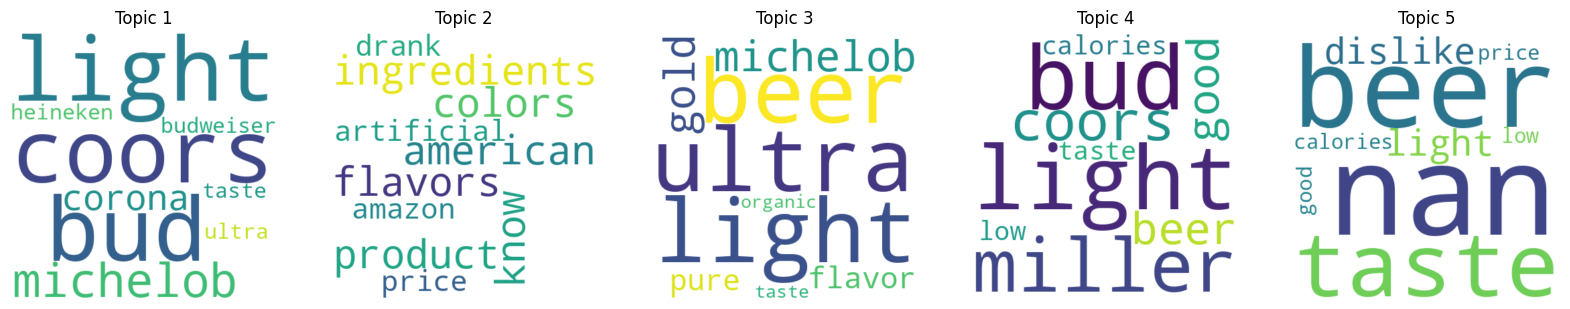

Analysis for Q16A. What is the most important thing you LIKE about the shown concept}?     This can include anything you would want kept for sure or aspects that might drive you to buy or try it…       Please type a detailed response in the space below:
Total Responses: 2280
Average Words per Response: 7.16
Average Characters per Response: 37.20
Most Common Words: [('the', 1072), ('i', 804), ('it', 772), ('and', 642), ('like', 596), ('is', 435), ('a', 415), ('taste', 371), ('that', 316), ("it's", 227)]


Analysis for Q16B. What is the most important thing you DISLIKE about the shown concept}?    This can include general concerns, annoyances, or any aspects of the product that need fixed for this to be more appealing to you...     Please type a detailed response in the space below.:
Total Responses: 2228
Average Words per Response: 5.23
Average Characters per Response: 27.24
Most Common Words: [('nothing', 784), ('i', 685), ('the', 495), ('it', 396), ('dislike', 305), ('is', 280), ('a',

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')




text_columns = [
    "Q16A. What is the most important thing you LIKE about the shown concept}?     This can include anything you would want kept for sure or aspects that might drive you to buy or try it…       Please type a detailed response in the space below",
    "Q16B. What is the most important thing you DISLIKE about the shown concept}?    This can include general concerns, annoyances, or any aspects of the product that need fixed for this to be more appealing to you...     Please type a detailed response in the space below.",
    "Q18_1 What specific product that you are currently using would the shown product replace?  Please type in ONE specific brand or product per space provided.",
    "Q18_2 What specific product that you are currently using would the shown concept replace?  Please type in ONE specific brand or product per space provided.",
    "Q18_3 What specific product that you are currently using would the shown concept replace?  Please type in ONE specific brand or product per space provided."
]


all_text = df[text_columns].astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)


def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(words)

df['processed_text'] = all_text.apply(preprocess_text)


vectorizer = CountVectorizer(max_features=5000, stop_words='english')
text_matrix = vectorizer.fit_transform(df['processed_text'])


num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(text_matrix)


words = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]
    topics[f"Topic {topic_idx+1}"] = top_words


print("Topic Modeling Results:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, topic in enumerate(topics.keys()):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join(topics[topic]))
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(topic)
plt.show()


def text_analysis(column_name):
    text_data = df[column_name].dropna()
    word_counts = text_data.apply(lambda x: len(str(x).split()))
    char_counts = text_data.apply(lambda x: len(str(x)))
    most_common_words = Counter(" ".join(text_data.astype(str)).lower().split()).most_common(10)

    print(f"Analysis for {column_name}:")
    print(f"Total Responses: {len(text_data)}")
    print(f"Average Words per Response: {np.mean(word_counts):.2f}")
    print(f"Average Characters per Response: {np.mean(char_counts):.2f}")
    print(f"Most Common Words: {most_common_words}")
    print("\n")


text_analysis(text_columns[0])
text_analysis(text_columns[1])



Topic Modeling Results:
Topic 1: heineken, budweiser, corona, budlight, modelo, coors, beer, dos, equis, steel
Topic 2: stella, good, artois, nice, know, quality, adams, sam, amazon, sierra
Topic 3: light, michelob, ultra, corona, coors, bud, blue, moon, extra, bush
Topic 4: nan, number, yes, queso, pasta, stick, cola, coca, redpoll, pepsi
Topic 5: light, bud, miller, coors, lite, budweiser, corona, busch, modelo, keystone


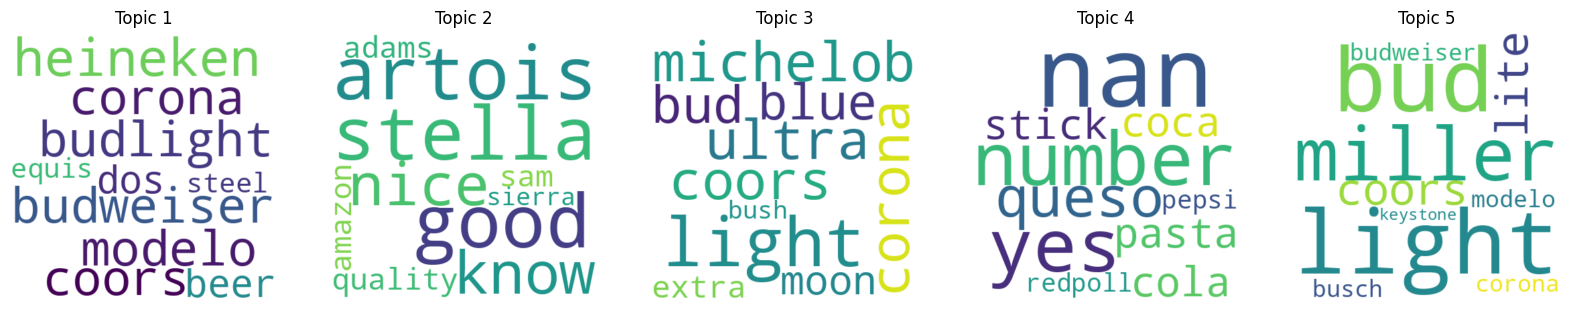

Analysis for Q18_1 What specific product that you are currently using would the shown product replace?  Please type in ONE specific brand or product per space provided.:
Total Responses: 1257
Average Words per Response: 1.53
Average Characters per Response: 8.92
Most Common Words: [('light', 349), ('bud', 208), ('coors', 116), ('budweiser', 109), ('miller', 96), ('corona', 95), ('ultra', 67), ('michelob', 66), ('lite', 58), ('heineken', 53)]


Analysis for Q18_2 What specific product that you are currently using would the shown concept replace?  Please type in ONE specific brand or product per space provided.:
Total Responses: 1226
Average Words per Response: 1.46
Average Characters per Response: 8.37
Most Common Words: [('light', 281), ('bud', 164), ('coors', 120), ('corona', 112), ('miller', 107), ('budweiser', 94), ('lite', 65), ('heineken', 44), ('michelob', 35), ('ultra', 30)]


Analysis for Q18_3 What specific product that you are currently using would the shown concept replace? 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import nltk
from nltk.corpus import stopwords


q18_columns = [
    "Q18_1 What specific product that you are currently using would the shown product replace?  Please type in ONE specific brand or product per space provided.",
    "Q18_2 What specific product that you are currently using would the shown concept replace?  Please type in ONE specific brand or product per space provided.",
    "Q18_3 What specific product that you are currently using would the shown concept replace?  Please type in ONE specific brand or product per space provided."
]

# Combine Q18 columns into one
q18_text = df[q18_columns].astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(words)

df['q18_processed_text'] = q18_text.apply(preprocess_text)


vectorizer = CountVectorizer(max_features=5000, stop_words='english')
text_matrix = vectorizer.fit_transform(df['q18_processed_text'])


num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(text_matrix)

# Extract topics
words = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]
    topics[f"Topic {topic_idx+1}"] = top_words


print("Topic Modeling Results:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")


fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, topic in enumerate(topics.keys()):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join(topics[topic]))
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(topic)
plt.show()


def text_analysis(column_name):
    text_data = df[column_name].dropna()
    word_counts = text_data.apply(lambda x: len(str(x).split()))
    char_counts = text_data.apply(lambda x: len(str(x)))
    most_common_words = Counter(" ".join(text_data.astype(str)).lower().split()).most_common(10)

    print(f"Analysis for {column_name}:")
    print(f"Total Responses: {len(text_data)}")
    print(f"Average Words per Response: {np.mean(word_counts):.2f}")
    print(f"Average Characters per Response: {np.mean(char_counts):.2f}")
    print(f"Most Common Words: {most_common_words}")
    print("\n")


for column in q18_columns:
    text_analysis(column)

In [34]:

beer_columns = [
    'Beer', 'Flavored/Mixed Beer', 'Non-Alcoholic Beers', 'Hard Ciders',
    'Hard Kombucha', 'Wine', 'Hard Beverage', 'Distilled Spirits',
    'Domestic Light Beer', 'Domestic Regular Beer', 'Low Calorie Carb Beer',
    'Domestic Craft', 'Imported Mexican Beer', 'Other Imported Beer',
    'Non-Alcoholic Beer'
]


for col in beer_columns:
    df_data_values[col] = df_data_values[col].astype(int)
    de_data_values[col] = de_data_values[col].astype(int)

print("All specified columns successfully converted to integer type!")


All specified columns successfully converted to integer type!


Main Model Results


In [184]:

class AlcoholSurveyRL:
    def __init__(self, num_questions, epsilon=0.1, alpha=0.1):
        self.num_questions = num_questions
        self.epsilon = epsilon
        self.alpha = alpha
        self.q_values = np.zeros(num_questions)
        self.action_counts = np.zeros(num_questions)

    def select_question(self):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.num_questions - 1)
        else:
            return np.argmax(self.q_values)

    def update_q_value(self, question_idx, reward):
        self.action_counts[question_idx] += 1
        self.q_values[question_idx] += self.alpha * (reward - self.q_values[question_idx])

    def run_survey(self, df, iterations=1000):
        rewards = []
        for _ in range(iterations):
            question_idx = self.select_question()
            reward = self.simulate_response(df, question_idx)
            self.update_q_value(question_idx, reward)
            rewards.append(reward)
        return rewards

    def simulate_response(self, df, question_idx):
        question_col = df.columns[question_idx]
        response_rate = df[question_col].notna().mean()
        return 1 if random.uniform(0, 1) < response_rate else 0

df.fillna(" ", inplace=True)
target = "OE_Quality_Flag"


categorical_cols = [
    "Q3. Which of the following best describes the area or community in which you live?  (Urban/Rural)",
    "Q4.  Please indicate the answer that includes your entire household income in (previous year) before taxes.  (Income)",
    "Q9. How relevant would you say the shown product is to you based on what you saw and read? (Concept Relevance)",
    "Q10. How appealing or unappealing is the shown product  to you? (Concept Appeal)",
]

numeric_cols = ['Q1. What is your current age?  (Age)', 'Beer', 'Flavored/Mixed Beer']
text_cols = [
    "Q16A", "Q16B", "Q18_1", "Q18_2", "Q18_3"
]


In [185]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [186]:
vectorizer = TfidfVectorizer(max_features=500)
svd = TruncatedSVD(n_components=100, random_state=42)
text_features = []
for col in text_cols:
    if col in df.columns:
        tfidf_matrix = vectorizer.fit_transform(df[col])
        reduced_features = svd.fit_transform(tfidf_matrix)
        text_features.append(reduced_features)
text_features = np.hstack(text_features) if text_features else np.zeros((df.shape[0], 100))

X = np.hstack([df[numeric_cols].values, df[categorical_cols].values, text_features])
y = df[target]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [187]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.4f}")
print(report)



✅ Model Accuracy: 0.9458
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       462
         1.0       0.96      0.92      0.94       386

    accuracy                           0.95       848
   macro avg       0.95      0.94      0.95       848
weighted avg       0.95      0.95      0.95       848

